In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.style.use("ggplot")

## Exercício 1

In [2]:
df = pd.read_csv("data/velocities.txt", delimiter = "	", names = ["time", "velocity"])

In [3]:
df

,time,velocity
0,0,0.000000
1,1,0.069478
2,2,0.137694
3,3,0.204332
4,4,0.269083
...,...,...
96,96,0.223073
97,97,0.254244
98,98,0.283753
99,99,0.311479


In [4]:
df["total_distance"] = np.zeros(len(df["time"]))
sum = 0 
for i in range(1,101):
    sum += (df["velocity"][i] + df["velocity"][i-1])*(df["time"][i] - df["time"][i-1])/2
    df.loc[i,"total_distance"] += sum

In [5]:
df

,time,velocity,total_distance
0,0,0.000000,0.000000
1,1,0.069478,0.034739
2,2,0.137694,0.138325
3,3,0.204332,0.309338
4,4,0.269083,0.546045
...,...,...,...
96,96,0.223073,7.089258
97,97,0.254244,7.327916
98,98,0.283753,7.596915
99,99,0.311479,7.894531


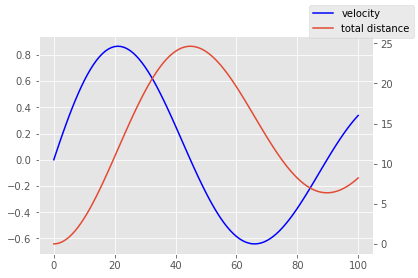

In [6]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.grid(False)

ax1.plot(df["time"], df["velocity"], color="b", label = "velocity")
ax2.plot(df["time"], df["total_distance"], label = "total distance")

fig.legend(loc ='upper right')

## Exercise 2

In [7]:
def funcao(x):
    return (x**4 - 2*x + 1)

In [8]:
def simpson(a,b,f,n):
    x = np.linspace(a,b,n+1)
    sum = 0
    for i,v in enumerate(x[0:n]):
        h = (x[i+1] - v)/2
        c = v + h
        sum += (f(v) + 4*f(c) + f(x[i+1]))*h/3
    return sum

sum = simpson(0,2,funcao, 10)
sum

4.400026666666667

In [9]:
print(f"erro absoluto = {abs(sum - 4.4)}")

erro absoluto = 2.6666666666841365e-05


In [10]:
print(simpson(0,2,funcao,100))
print(simpson(0,2,funcao,1000))

4.400000002666666
4.400000000000267


## Exercise 3

In [11]:
def f(x):
    return np.exp(-x**2)

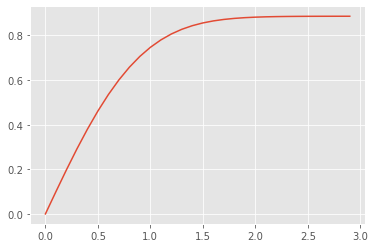

In [12]:
#vou usar o método anterior pq sou preguiçoso
E_x = [simpson(0,x,f,100) for x in np.arange(0,3,0.1)]
fig, ax = plt.subplots()
ax.plot(np.arange(0,3,0.1), E_x)

## Exercise 4

In [13]:
def f2(t,xx,m):
    return np.cos(m*t-xx*np.sin(t))
    
def simpson2(a,b,f,n,xx,m):
    x = np.linspace(a,b,n)
    sum = 0
    for i,v in enumerate(x[0:n-1]):
        h = (x[i+1] - v)/2
        c = v + h
        sum += (f(v,xx,m) + 4*f(c,xx,m) + f(x[i+1],xx,m))*h/3
    return sum

def J(m,x):
    return (1/np.pi * simpson2(0,np.pi,f2,1000,x,m))

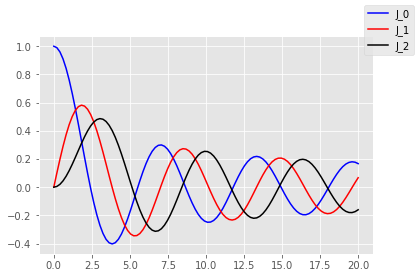

In [14]:
x = np.linspace(0,20,100)
J0 = [J(0,xx) for xx in x]
J1 = [J(1,xx) for xx in x]
J2 = [J(2,xx) for xx in x]

fig, ax = plt.subplots()

ax.plot(x, J0,c = "b", label = "J_0")
ax.plot(x, J1, c = "r", label = "J_1")
ax.plot(x, J2, c = "black", label = "J_2")

fig.legend()